In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


In [2]:
# Matplotlib settings
fontsize = 14
linewidth = 3
markersize = 8
plt.style.use('seaborn-v0_8-bright')

# Global settings for matplotlib
matplotlib.rcParams.update({
    'mathtext.fontset': 'stix',
    'font.family': 'Arial',
    'font.size': fontsize,
    'axes.labelsize': fontsize + 4,
    'axes.linewidth': linewidth,
    'lines.markersize': markersize,
    'xtick.major.width': linewidth,
    'ytick.major.width': linewidth,
    'legend.fontsize': fontsize,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'errorbar.capsize': 5,
    'xtick.major.size': 6,
    'ytick.major.size': 6,
})


In [3]:
# Data in the format: [mean, lower bound, upper bound]
data = {
    0: [0.01591423, 0.0095043, 0.02230793],
    1: [0.04678213, 0.03734973, 0.05624945],
    2: [-0.00979714, -0.01340647, -0.00619987],
    3: [0.12145884, 0.10721573, 0.13598954],
    4: [0.0129341, 0.00075824, 0.02534068]
}

# Extracting means, lower bounds, and upper bounds
# states = list(data.keys())
states = ['$\mathcal{S}_0$', '$\mathcal{S}_1$', '$\mathcal{S}_2$', '$\mathcal{S}_3$', '$\mathcal{S}_4$']
means = np.array([val[0]*100 for val in data.values()])
lower_bounds = np.array([val[1]*100 for val in data.values()])
upper_bounds = np.array([val[2]*100 for val in data.values()])
y_err_low = means - lower_bounds
y_err_up = upper_bounds - means

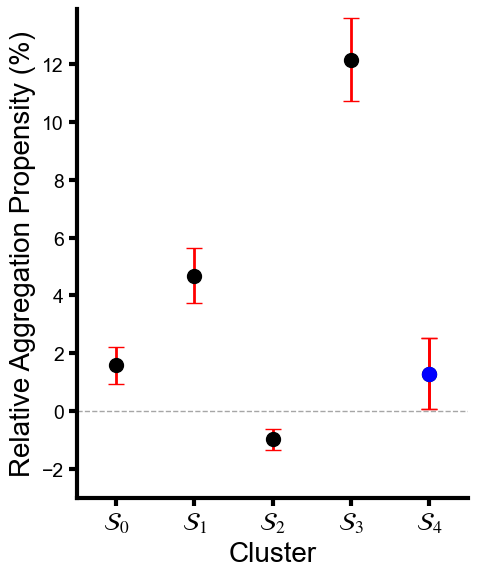

In [5]:
fig, ax = plt.subplots(figsize=(5, 6))

# Plot all points
ax.errorbar(states, means, yerr=[y_err_low, y_err_up], fmt='o', 
            color='black', ecolor='red', elinewidth=2, capsize=6, markersize=10)

# Highlight significant and insignificant differences
significance = [True, True, True, True, False]  # Example significance list
for i, sig in enumerate(significance):
    if not sig:
        # Replot insignificant points in blue
        ax.errorbar(states[i], means[i], yerr=[[y_err_low[i]], [y_err_up[i]]], 
                    fmt='o', color='blue', ecolor='red', elinewidth=2, capsize=6, markersize=10)

# Draw a horizontal line at y=0
ax.axhline(y=0.0, color='gray', linestyle='--', linewidth=1, alpha=0.7)



ax.set_xticks(states)
ax.set_xlim([-0.5, 4.5])
ax.set_xticklabels(states, fontsize=fontsize + 4)
ax.set_xlabel('Cluster', fontsize=fontsize + 6)

ax.set_ylabel('Relative Aggregation Propensity (%)', fontsize=fontsize + 6)
# Adjust y-ticks for better readability
ax.set_yticks(np.arange(-2, 15, 2))  # Adjusted to range from -2% to 14% with 2% intervals
ax.set_ylim([-3, 13.9])
# ax.set_yticks(np.arange(-5, 15, 5))

# Tight layout for better spacing
plt.tight_layout()

# Adding a legend to indicate significance
# ax.legend(['p > 0.05'], loc='best', fontsize=fontsize)
plt.savefig('Rel_Agg_Propensity.png', dpi=1000)
plt.show()
